In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

sns.set()
%matplotlib inline

c:\users\vlad nechai\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
link = 'https://raw.githubusercontent.com/yehorchankov/udata-school/master/hw_3_data.csv'

data = pd.read_csv(link)
data.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,lbl
0,-0.105348,-0.765285,-0.105348,0.284124,0.430165,-0.496225,-1.630323,0.430165,-0.371408,-0.368030,0.0
1,0.078798,0.255358,0.078798,-0.464293,-0.340239,0.242046,0.539097,-0.340239,0.367130,-0.215124,0.0
2,0.138852,0.717872,0.138852,1.057301,0.130399,0.191773,1.446804,0.130399,-0.773516,1.043496,3.0
3,0.178963,0.820882,0.178963,1.750779,0.364299,-1.134097,1.618704,0.364299,-1.348497,1.469060,3.0
4,-0.928943,-0.583325,-0.928943,1.632376,1.674338,0.902454,-0.876673,1.674338,-0.345720,2.792298,2.0


## Data Exploration

In [3]:
data['lbl'] = data['lbl'].astype(np.int).astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 11 columns):
f0     40000 non-null float64
f1     40000 non-null float64
f2     40000 non-null float64
f3     40000 non-null float64
f4     40000 non-null float64
f5     40000 non-null float64
f6     40000 non-null float64
f7     40000 non-null float64
f8     40000 non-null float64
f9     40000 non-null float64
lbl    40000 non-null object
dtypes: float64(10), object(1)
memory usage: 3.2+ MB


In [4]:
data.describe()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,-0.002991,0.003209,-0.002991,-0.009630,-0.002443,-0.006919,0.008981,-0.002443,0.012763,0.005384
std,0.555049,0.669027,0.555049,1.473199,0.792873,1.000283,1.320918,0.792873,1.453225,1.324047
min,-1.905599,-3.160811,-1.905599,-5.414462,-3.210632,-3.933070,-6.372736,-3.210632,-4.788817,-4.911375
25%,-0.349748,-0.555245,-0.349748,-1.062237,-0.556013,-0.688123,-1.007493,-0.556013,-1.036148,-1.024616
50%,-0.073417,0.037319,-0.073417,0.075740,0.081158,-0.009233,0.009509,0.081158,0.053543,0.036987
75%,0.424013,0.531874,0.424013,1.045986,0.494282,0.671744,1.041563,0.494282,1.071657,1.014510
max,2.782764,2.263375,2.782764,5.027650,2.735036,4.492202,4.276321,2.735036,5.395193,5.353837


In [5]:
data[['lbl']].describe()

,lbl
count,40000
unique,4
top,1
freq,10009


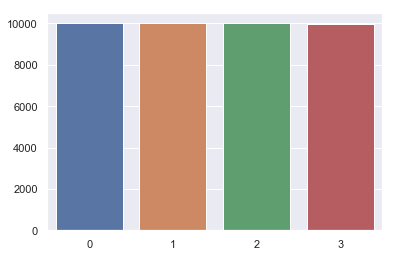

In [6]:
sns.barplot(x = data['lbl'].value_counts().index, y = data['lbl'].value_counts().values)
plt.show()

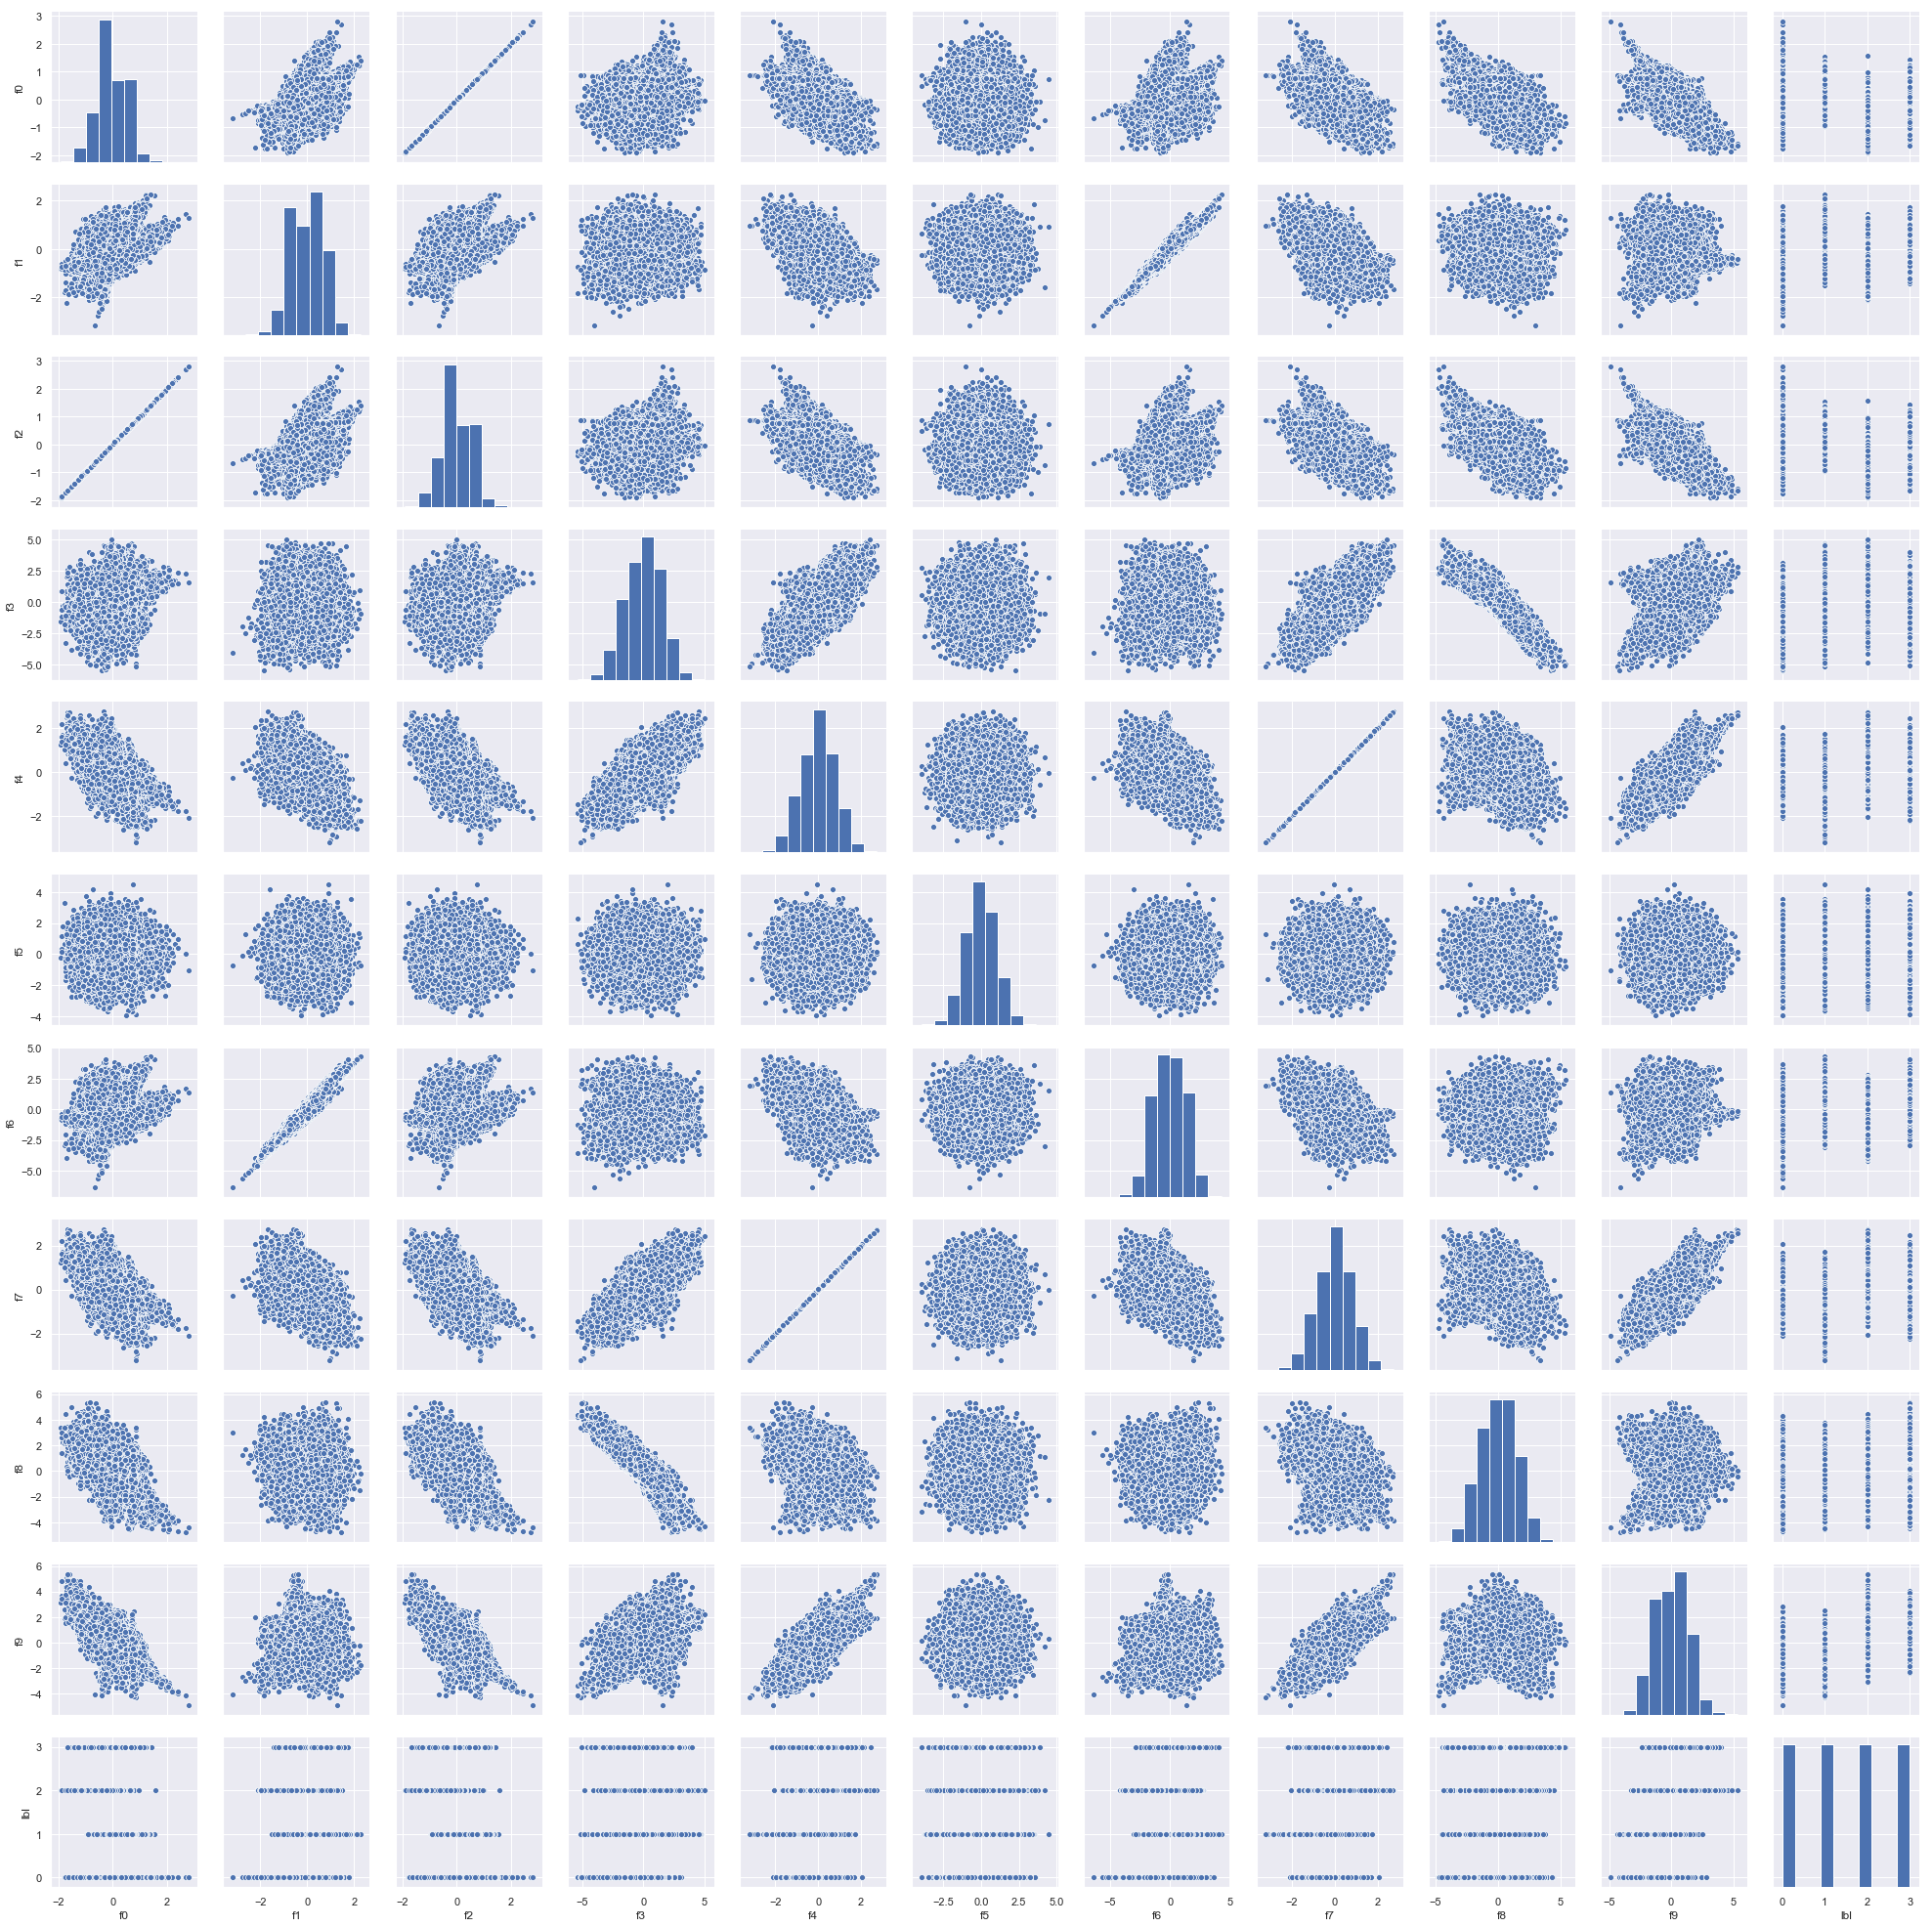

In [49]:
sns.pairplot(data)
plt.show()

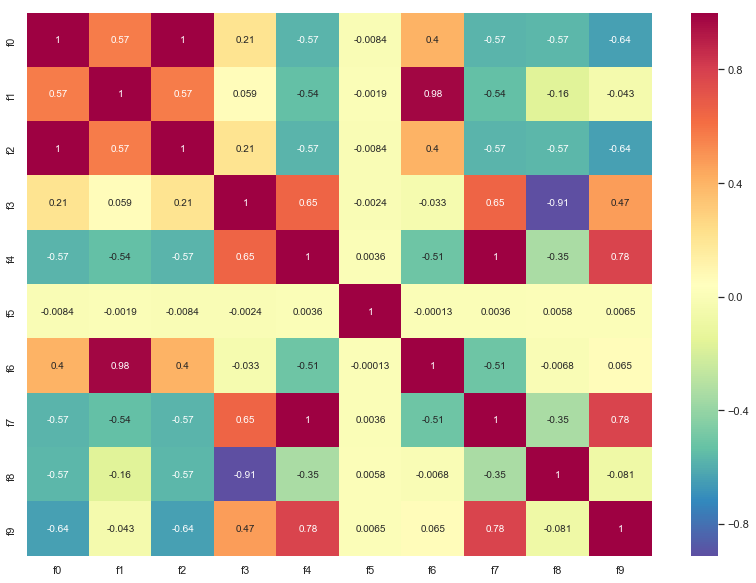

In [7]:
fig, ax = plt.subplots(figsize = (14, 10))
sns.heatmap(data.corr(), annot = True, cmap = 'Spectral_r')
plt.show()

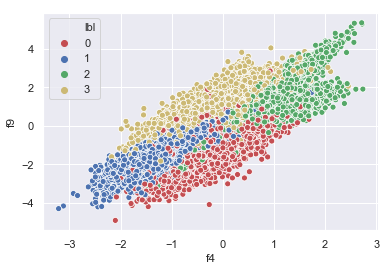

Wall time: 4.12 s


In [8]:
%%time
sns.scatterplot(x = 'f4', y = 'f9', data = data, hue = 'lbl', palette = ['r', 'b', 'g', 'y'])
plt.show()

In [9]:
print(np.sum(abs(data['f2'] - data['f0'])))
print(np.sum(abs(data['f4'] - data['f7'])))

0.0
0.0


Absolutely indentical columns : f2 and f0; f4 and f7

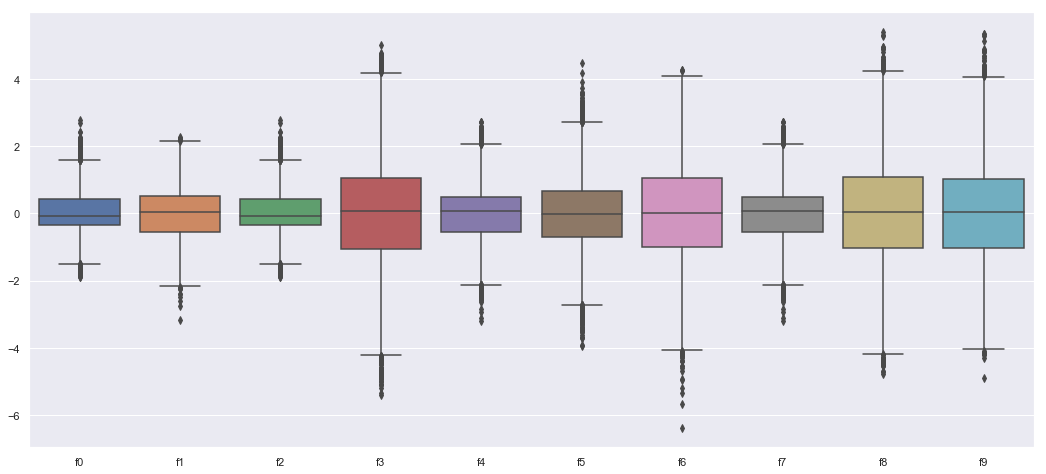

In [10]:
fig, ax = plt.subplots(figsize = (18, 8))
sns.boxplot(data = data.iloc[:,:-1])
plt.show()

Some outliers, dealing with them might be not vital

In [11]:
from sklearn.decomposition import PCA

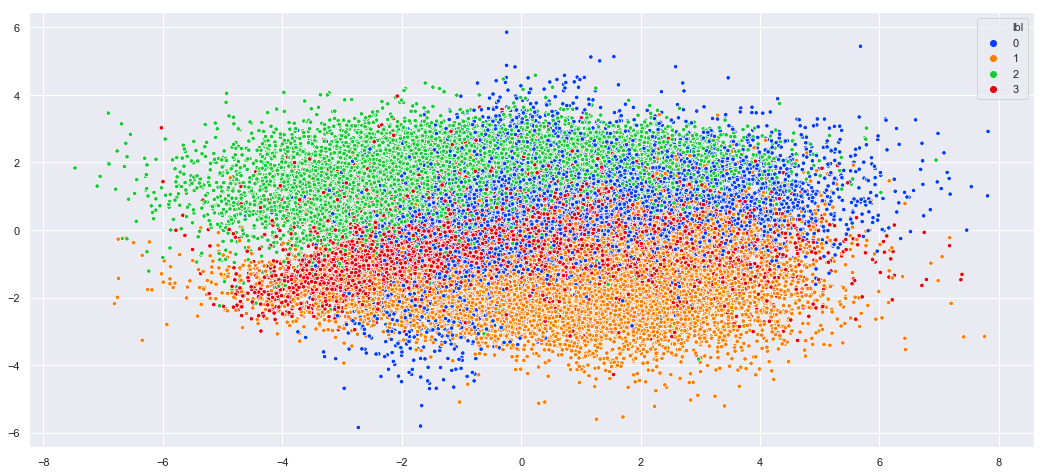

In [12]:
pca = PCA(n_components = 2)
data_tr = pca.fit_transform(data.drop(['f2', 'f7', 'lbl'], axis = 1))
fig, ax = plt.subplots(figsize=(18,8))
sns.scatterplot(x = data_tr.T[0], y = data_tr.T[1], hue = data['lbl'], 
                palette = sns.color_palette("bright")[:len(data['lbl'].unique())], s = 20)
plt.show()

In [13]:
def remove_outlier(data0, col_name):
    data = data0.copy()
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3-q1 
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    data = data.loc[(data[col_name] > fence_low) & (data[col_name] < fence_high)]
    return data

## Classification

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split

In [15]:
svm = SVC()
lr = RidgeClassifier()

In [16]:
x_data, y_data = data.drop(['f2', 'f7', 'lbl'], axis = 1), data['lbl']
x_data['f6f1'] = x_data['f6'] * x_data['f1']
x_data.drop(['f6', 'f1'], axis = 1, inplace = True)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 1)

In [18]:
%%time
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)

c:\users\vlad nechai\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Wall time: 19.6 s


In [19]:
%%time
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)

Wall time: 234 ms


In [20]:
print('SVM:\t\taccuracy ', accuracy_score(y_test, svm_pred))
print('Ridge:\taccuracy ', accuracy_score(y_test, lr_pred))

SVM:		accuracy  0.8735
Ridge:	accuracy  0.8005


Lets see how it works if we remove outliers

In [21]:
df = data.copy()
for col in df.columns[:-1]:
    df = remove_outlier(df, col)

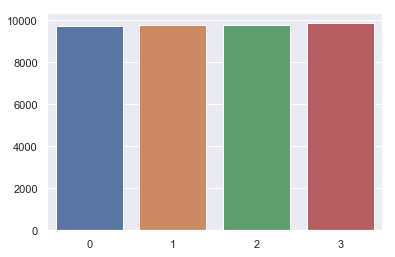

In [22]:
sns.barplot(x = df['lbl'].value_counts().index, y = df['lbl'].value_counts().values)
plt.show()

Labels are distributed evenly and we didn't drop much of data, so this will do

In [23]:
x_data, y_data = df.drop(['f2', 'f7', 'lbl'], axis = 1), df['lbl']
x_data['f6f1'] = x_data['f6'] * x_data['f1']
x_data.drop(['f6', 'f1'], axis = 1, inplace = True)

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 1)

In [25]:
%%time
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)

c:\users\vlad nechai\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Wall time: 19.7 s


In [26]:
%%time
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)

Wall time: 245 ms


In [27]:
print('SVM:\t\taccuracy ', accuracy_score(y_test, svm_pred))
print('Ridge:\taccuracy ', accuracy_score(y_test, lr_pred))

SVM:		accuracy  0.8686429849220547
Ridge:	accuracy  0.7913365704063379


The score decreased, we'll keep initial data

In [28]:
x_data, y_data = data.drop(['f2', 'f7', 'lbl'], axis = 1), data['lbl']
x_data['f6f1'] = x_data['f6'] * x_data['f1']
x_data.drop(['f6', 'f1'], axis = 1, inplace = True)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 1)

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
%%time
grid_r = {'alpha' : [0.5,1,2,4,5,6,10]}

gs_r = GridSearchCV(lr, grid_r, cv = 3, scoring = make_scorer(accuracy_score))
gs_r.fit(x_train, y_train)
print('Ridge best accuracy: ', str(gs_r.best_score_), '\nAt', gs_r.best_params_)

Ridge best accuracy:  0.78634375 
At {'alpha': 4}
Wall time: 4.28 s


In [78]:
%%time
grid_svm = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'], 'C' : [2, 1, 0.1, 0.01, 4]}

gs_svm = GridSearchCV(svm, grid_svm, cv = 3)
gs_svm.fit(x_train, y_train)
print('SVM best accuracy: ', str(gs_svm.best_score_), '\nAt', gs_svm.best_params_)

c:\users\vlad nechai\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\vlad nechai\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\vlad nechai\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "av

SVM best accuracy:  0.86984375 
At {'C': 4, 'kernel': 'rbf'}
Wall time: 42min 13s


## Cluster analysis

### HELPERS

In [31]:
def plot_clusters(X, y, centers=None, ax=None):
    colors = cm.nipy_spectral(y.astype(float) / np.unique(y).shape[0])
    if ax is not None:
        ax.scatter(X.iloc[:, 0], X.iloc[:, 1], marker='.', lw=0, s=30, alpha=0.7,
                    c=colors, edgecolor='k')
        # Draw white circles at cluster centers
        if centers is not None:
            ax.scatter(centers[:, 0], centers[:, 1], marker='o',
                        c="white", alpha=1, s=200, edgecolor='k')
            for i, c in enumerate(centers):
                ax.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                            s=50, edgecolor='k')
    else:
        plt.scatter(X.iloc[:,0], X.iloc[:,1], c=colors, s=10)
        if centers is not None:
            plt.scatter(centers[:,0], centers[:,1], c='red', marker='*')

def configure_subplots(n_samples, n_clusters, silhouette_avg, cluster_labels):
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, n_samples + (n_clusters + 1) * 10])
    
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    
    ax2.set_yticks([])
    ax2.set_xticks([])
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    return ax1, ax2

def plot_silhouette(ax, i, cluster_labels, silhouette_scores, n_clusters, y_lower):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        silhouette_scores[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = cm.nipy_spectral(float(i) / n_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    return y_upper + 10  # 10 for the 0 samples

def plot_clusters_final(clusters, X, y, pred, clusterer):
    for n_clusters in clusters:
        silhouette_avg = silhouette_score(X, y, sample_size = 10000)

        ax1, ax2 = configure_subplots(len(X), n_clusters, silhouette_avg, y)
        
        indexes = np.random.choice(range(len(X)), 10000)
        
        x_s, pred_s = X.iloc[indexes], pred[indexes]

        sample_silhouette_values = silhouette_samples(x_s, pred_s)

        y_lower = 10
        for i in range(n_clusters):
            y_lower = plot_silhouette(ax1, i , pred_s,
                                      sample_silhouette_values, n_clusters, y_lower)


        centers = clusterer.cluster_centers_

        plot_clusters(X, pred, centers, ax2)
    plt.show()

In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import DBSCAN
from scipy.spatial import distance_matrix

In [33]:
X, y = data.drop('lbl', axis = 1), data['lbl']

## KMeans

In [34]:
kmeans = KMeans(n_clusters = len(y.unique())*2)
kmeans_pred = kmeans.fit_predict(X)

kmeans_silhouette = silhouette_score(X, kmeans_pred, sample_size = 10000)
kmeans_ars = adjusted_rand_score(y, kmeans_pred)

print('KMeans Silhouette: ' + str(kmeans_silhouette))
print('KMeans Ars: ' + str(kmeans_ars))

KMeans Silhouette: 0.22756908228462902
KMeans Ars: 0.26792630122348665


For n_clusters = 8 The average silhouette_score is : 0.10752523036812017


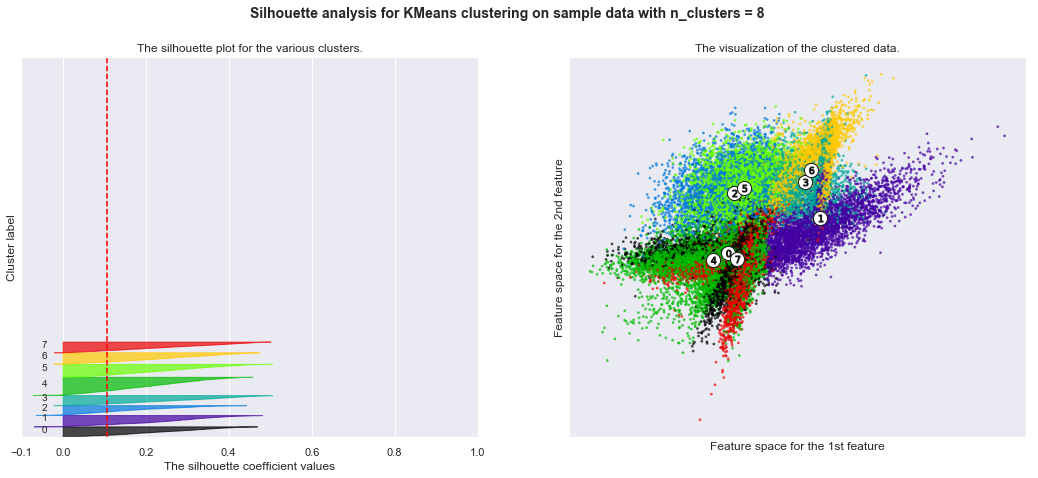

In [35]:
plot_clusters_final([len(y.unique())*2], X, y, kmeans_pred, kmeans)

## DBScan

In [36]:
def find_min_nonzero_dist(data_full, x):
    # Make every point the size of (1,2)
    dist_vect = distance_matrix(data_full, [x])
    # Don't count if the distance is 0 - it may be the same point
    nonzero_elems = dist_vect[np.nonzero(dist_vect)]   
    return np.min(nonzero_elems)

def number_of_point_within_distance(data, dist):
    # Find number of closest neighbors around every point of data, 
    # that falls into a sphere of radius = dist
    result = np.array([])
    for x in data:
        dist_vect = distance_matrix(data, x.reshape(1, 2))
        filtered_elems = dist_vect[dist_vect <= dist]
        # -1 because the point has zero distance to itself, don't count it 
        count = filtered_elems.shape[0] - 1 
        result = np.append(result, count) 
    return result

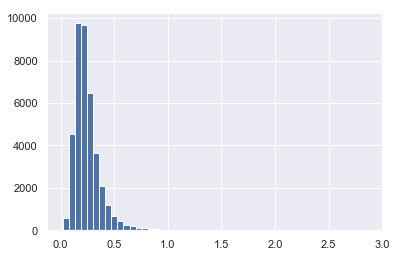

In [37]:
# Find distances to the closest points 
min_distances = np.apply_along_axis(lambda x: find_min_nonzero_dist(X, x),
                                   axis = 1,
                                   arr = X)
# Visualize distribution of distances to the closest neighbors
plt.hist(min_distances, bins = 50)
plt.show()

Taking eps = 0.5, as it covers nearly most of min distances

In [38]:
eps = 0.5
min_pts = 20

dbscan = DBSCAN(eps, min_pts)
dbscan_pred = dbscan.fit_predict(X)


dbscan_silhoutte_ = silhouette_score(X, dbscan_pred, sample_size = 10000)
dbscan_ars = adjusted_rand_score(y, dbscan_pred)

print('DBScan Silhoutte: ' + str(dbscan_silhoutte_))
print('DBScan Ars: ' + str(dbscan_ars))

DBScan Silhoutte: -0.17975051709560966
DBScan Ars: 0.010171632278145628


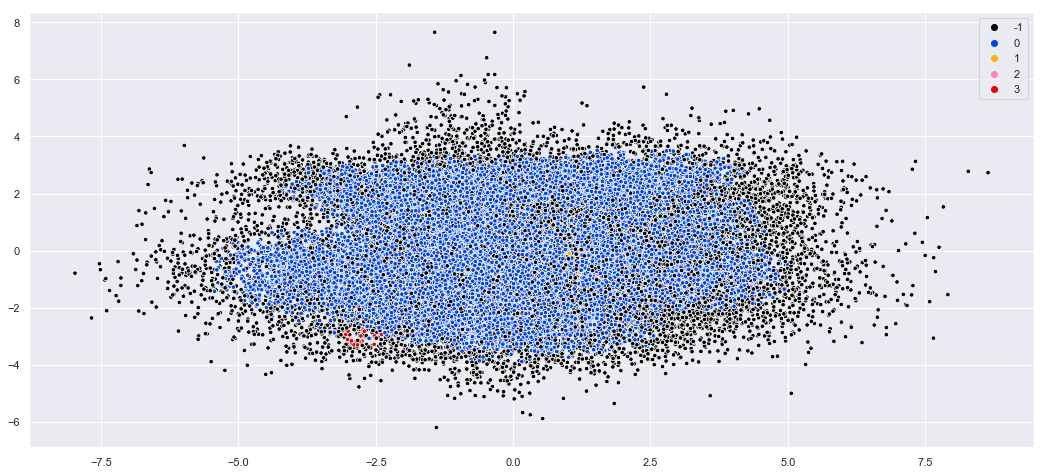

In [39]:
pca = PCA(n_components = 2)
data_tr = pca.fit_transform(X)
fig, ax = plt.subplots(figsize=(18,8))
colors = ['black', "blue", "amber", "pink", "red"]
sns.scatterplot(x = data_tr.T[0], y = data_tr.T[1], hue = dbscan_pred, 
                palette = sns.xkcd_palette(colors), s = 20)
plt.show()

DBScan is absolutely not efficient, points seem not to form distinct clusters